# Corrections et révisions

## Nom de variables et type

In [1]:
def tronquer_1( l ):
    return l[1:]


In [2]:
l=[1,2,3]
tronquer_1(l)

[2, 3]

Donc attention aux nom donné aux paramêtres formels, il peut être aussi utile de se premunir contre des fautes, en utilisant la commande **try** qui permet la gestion des exceptions

In [3]:
def tronquer_liste( ma_liste ):
    try:
        return ma_liste[1:]
    except TypeError:
        print("Cette fonction n'accepte que des listes ou des chaînes de caractères")

In [4]:
l=[1,2,3]
tronquer_liste(l)

[2, 3]

## Chaînes et Listes

### Erreurs classiques sur les Chaines de caractères

A list comprehension can be used inside a **str**, but sometimes it is dangerous to look for too compact solutions. 

> Ici la mauvaise utilisation d'une liste de comprehension est la raison du problème


In [5]:
def extraire_avant_premier(s):
    return s[ : str.find(s,",") ]

print( extraire_avant_premier("chat") ) ## cha

cha


> En cherchant une solution plus détaillé, on peut inclure un *test conditionnel*

In [6]:
def extraire_avant_premier(s):
    if str.find(s,",") == -1:
        return s
    return s[ : str.find(s,",") ]

print( extraire_avant_premier("chat") ) ## Affiche chat

chat


> On peut également utiliser une déclaration comme **try** on appelle cela un *catch*

On peut utiliser un catch de ZeroDivisionError

In [7]:
def extraire_avant_premier(s):
    try: 
        1/(1+str.find(s,","))
        return s[ : str.find(s,",") ]
    except ZeroDivisionError:
        return s

print( extraire_avant_premier("chat, chien") ) ## Affiche chat

chat


### Les chaines de caractères, sont d'abord utiles pour retravailler la présentation d'un tableau

In [8]:
def completer_2(s,n):
    return(s.ljust(n,' '))

> dans cet exemple on va faire l'appel

In [9]:
Mon_Nom1 = 'DE SAINT-EXUPERY'
Mon_Nom2 = 'CAMUS'
#? Mon_Nom.ljust
print(Mon_Nom1.ljust(25,' '),'present !')
print(Mon_Nom2.ljust(25,' '),"c'est moi")

DE SAINT-EXUPERY          present !
CAMUS                     c'est moi


# Erreurs classiques sur les listes

In [10]:
#Les Delistes
def tronquer_2(n):
    if n== []:
        return []
    else:
        del n[0]
        return  n
liste_1 = [1,2,3]
liste_2 = tronquer_2( liste_1 )
print( liste_1 ) ## affiche [2,3]
print( liste_2 ) ## affiche [2,3]

[2, 3]
[2, 3]


In [11]:
#Les Popistes
def tronquer_2(a):
    if a == [] :
        return []
    a.pop(0)
    return a

liste_1 = [1,2,3]
liste_2 = tronquer_2( liste_1 )
print( liste_1 ) ## affiche [2,3]
print( liste_2 ) ## affiche [2,3]

[2, 3]
[2, 3]


# Visualisation d'un phénomène physique

## Visualisation d'un phénomène physique

$$B(x)=\frac{\mu_o}{4\pi}.I_o.\frac{r^2}{2 (r^2 +x^2)^{3/2} }$$

L'equation de Biot-et-Savart

In [12]:
# -*- coding: utf-8 -*-


import numpy as np

# Constantes
my0=4*np.pi*1e-7;   # permeabilite du vide 
I0=-1;              # intensité du courant
                    # le courant circule de gauche a droite

# Dimensions
d=25*1e-3 # Diametre de la spire (m)
r=d/2 # rayon de la spire (m)
segments=100 # discretisation de la spire
alpha = 2*np.pi/(segments-1) # discretisation de l'angle 

# initialisation de la spire
x=[i*0 for i in range(segments)]
y=[r*np.sin(i*alpha) for i in range(segments)]
z=[-r*np.cos(i*alpha) for i in range(segments)]



In [13]:
# Definition du sens du positif du courant : gauche -> droite
# pour le calcul les longeurs sont exprimees en m

x_spire=np.array([x]);
y_spire=np.array([y]);
z_spire=np.array([z]);


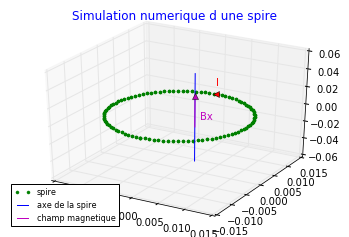

In [14]:
%matplotlib inline

#%%%%%%%%%%%%%%%       Affichage de la spire en 3D   %%%%%%%%%%%%%%%%#


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure()
ax = fig.gca(projection='3d')

#titre du graphe
plt.title ('Simulation numerique d une spire', color='b')
            

# spire
plt.plot(y_spire [0], z_spire[0],  'g.',  linewidth=1, label='spire')
plt.plot(y_spire, z_spire,  'g.',  linewidth=1)

# vecteur champ magnetique Bx
plt.plot(([0.003,0.003]),([0,0]),([-.05,0.05]), 'b-',label='axe de la spire',linewidth=1)
plt.plot(([0.003,0.003]),([0,0]),([-.01,0.02]), 'm-',label='champ magnetique',linewidth=1)
plt.plot([0.003],[0],[0.025], 'm', marker='^', linewidth=2)
ax.text(0.004,0,0,'Bx', color='m')

#courant
plt.plot([0],[0.0125],[0], 'r', marker='<')
ax.text(0,0.0125,0.01,'I', color='r')

#legende du graphe
plt.legend (loc='lower left', prop={'size':8})

plt.show()



In [15]:
#%%%%%%%%%% Calcul du champ magnetique d apres Biot et Savart


ndp=50 # Nombre de points

# limites x
xmin,xmax=-0.05,0.05

# limites y
ymin, ymax=-0.05, 0.05

# limites z
zmin, zmax=-0.05,0.05

dx=(xmax-xmin)/(ndp-1) #increment x
dy=(ymax-ymin)/(ndp-1) # increment y
dz=(zmax-zmin)/(ndp-1) # increment z


In [16]:

#%%%%%%%%%%%%%%%        Calcul magnetostatique    %%%%%%%%%%%%%%%%%%%%%%%%%%%#

bxf=np.zeros(ndp)  # initialisation de la composante  Bx du champ 
byf=np.zeros(ndp)  # initialisation de la composante  By du champ
bzf=np.zeros(ndp)  # initialisation de la composante  Bz du champ

I0f1=my0*I0/(4*np.pi) # Magnetostatique (on multiplie le courant 
                      #I0 par mu0/(4.pi))

# Integration du champ induit en un point de l'axe bleu
# par le courant circulant sur chaque segment de la spire verte

bfx,bfy,bfz=0,0,0

nseg=np.size(z_spire)-1

for i in range(ndp):
    #Initialisation des positions
    xM=(xmin+i*dx)
    yM,zM=0,0
  
    #Initialisation des champs locaux   
    bfx,bfy,bfz=0,0,0
    
    R=np.array([xM,yM,zM])
    # vecteur position sur 
    # le point qui doit etre calcule
    # en integrant la contribution 
    # de tous les courants le long
    # de la boucle verte
    for wseg in range(nseg):
            xs=x_spire[0][wseg]
            ys=y_spire[0][wseg]
            zs=z_spire[0][wseg]
        
            Rs=np.array([xs, ys, zs])
        
            drsx=(x_spire[0][wseg+1]-x_spire[0][wseg])
            drsy=(y_spire[0][wseg+1]-y_spire[0][wseg])
            drsz=(z_spire[0][wseg+1]-z_spire[0][wseg])
    
            drs=np.array([drsx, drsy, drsz])
            #direction du courant
        
            Delta_R= Rs - R
            #vecteur entre l'élement de spire et 
            #le point où est calcul le champ
 
            Delta_Rdist=np.sqrt(Delta_R[0]**2+Delta_R[1]**2+Delta_R[2]**2)
        
            #Delta_Rdis2=Delta_Rdist**2
            Delta_Rdis3=Delta_Rdist**3
        
            b2=1.0/Delta_Rdis3
            b12=I0f1*b2*(-1)
        
            # Produit vectoriel
            Delta_Rxdrs_x=Delta_R[1]*drsz-Delta_R[2]*drsy
            Delta_Rxdrs_y=Delta_R[2]*drsx-Delta_R[0]*drsz
            Delta_Rxdrs_z=Delta_R[0]*drsy-Delta_R[1]*drsx
        
            #Intégration
            bfx=bfx+b12*Delta_Rxdrs_x
            bfy=bfy+b12*Delta_Rxdrs_y
            bfz=bfz+b12*Delta_Rxdrs_z
        
# Il faut utiliser un champ defini comme 3 listes :
# une liste pour chaque abscisse      
    bxf[i]+=bfx
    byf[i]+=bfy
    bzf[i]+=bfz



In [17]:

#%%%%%%%%%%%  Modele Theorique   %%%%%%%%%%%%%%%%%%#
#r=d/2;    # rayon de la spire en mm
#r=r*1e-3; # rayon de la spire en m
#valeur absolue de la composante Bx du champ magnetique en fonction de la position sur l axe de la spire
bx_analytique=[abs(my0*I0)*(r)**2/(2*((r)**2+(x)**2)**(3/2)) for x in np.linspace(xmin, xmax, ndp, endpoint = True)]


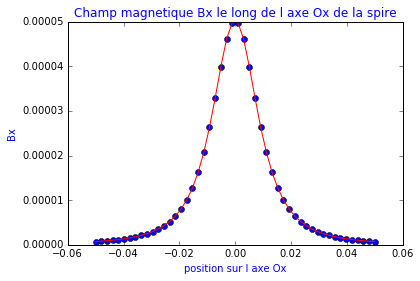

In [18]:
#%%%%%%%%%%%  Visualisation %%%%%%%%%%%%%%%%%%%%%%%#

#trace de la valeur absolue de la composante Bx du champ magnetique en fonction de x 
plt.plot(np.linspace(xmin, xmax, ndp, endpoint = True) , bxf,'bo')
plt.plot(np.linspace(xmin, xmax, ndp, endpoint = True) , bx_analytique,'r-')
plt.title ('Champ magnetique Bx le long de l axe Ox de la spire', color='b')
plt.xlabel('position sur l axe Ox', color='b')
plt.ylabel ('Bx', color='b')

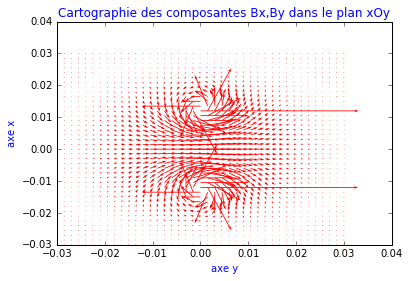

In [19]:
#etude de la composante bx1 du champ magnetique en differents points du plan xOy


#initialisation du champ magnétique bx1
bx1=0
by1=0
#Initialisation de l energie
Em=0
Emf=0

#Indice pour les listes
l=0

#ndp-1 intervalles
ndp1=41

#### pour verification de Bx sur l'axe Ox avec yM,zM=0,0
##BD seul cas ou la comparaison analytique est possible
####

#initialisation des listes des coordonnees des points
s = (ndp1,ndp1)

xM1f=np.zeros(s)
yM1f=np.zeros(s)
#zM1f=np.zeros(ndp1*ndp1)
u = np.zeros(s)
X = np.zeros(s)
Y = np.zeros(s)

#initialisation de la liste des valeurs de la composante Bx1 en chaque point
bx1f=np.zeros(s)
#initialisation de la liste des valeurs de la composante By1 en chaque point 
by1f=np.zeros(s)
#initialisation de la liste des valeurs de la composante By1 en chaque point 
bz1f=np.zeros(s)

#calcul exact du coefficient b0 de l'integrale servant a calculer Bx
#selon la formule: b0=mu0*I0*r/(2*pi)
b0=2*10**(-7)*I0*r

#coordonnees des points
xM1f = np.linspace(-.03,.03,ndp1)
yM1f = np.linspace(-.03,.03,ndp1)

(X,Y) = np.meshgrid(xM1f,yM1f)

#calcul de Bx1 en des points regulierement espaces du plan xoy autour de la spire
##BD Physiquement ce calcul doit s'appuyer sur un modele numerique car l'equation analytique est injustifiable des que l'on est excentre
#Initialisation des positions

xM, yM,zM=0,0,0

for i in range(ndp1):
          
    #Initialisation des champs locaux   
    bfx,bfy,bfz=0,0,0
    
    
    for j in range(ndp1):
        
        xM=X[i][j]
        yM=Y[i][j]
        
        #Initialisation des champs locaux   
        bfx,bfy,bfz=0,0,0
    
        R=np.array([xM,yM,zM])
        # vecteur position sur 
        # le point qui doit etre calcule
        # en integrant la contribution 
        # de tous les courants le long
        # de la boucle verte
        for wseg in range(nseg):
            xs=x_spire[0][wseg]
            ys=y_spire[0][wseg]
            zs=z_spire[0][wseg]
        
            Rs=np.array([xs, ys, zs])
        
            drsx=(x_spire[0][wseg+1]-x_spire[0][wseg])
            drsy=(y_spire[0][wseg+1]-y_spire[0][wseg])
            drsz=(z_spire[0][wseg+1]-z_spire[0][wseg])
    
            drs=np.array([drsx, drsy, drsz])
            #direction du courant
        
            Delta_R= Rs - R
            #vecteur entre l'élement de spire et 
            #le point où est calcul le champ
 
            Delta_Rdist=np.sqrt(Delta_R[0]**2+Delta_R[1]**2+Delta_R[2]**2)
        
            #Delta_Rdis2=Delta_Rdist**2
            Delta_Rdis3=Delta_Rdist**3
        
            b2=1.0/Delta_Rdis3
            b12=I0f1*b2*(-1)
        
            # Produit vectoriel
            Delta_Rxdrs_x=Delta_R[1]*drsz-Delta_R[2]*drsy
            Delta_Rxdrs_y=Delta_R[2]*drsx-Delta_R[0]*drsz
            Delta_Rxdrs_z=Delta_R[0]*drsy-Delta_R[1]*drsx
        
            #Intégration
            bfx=bfx+b12*Delta_Rxdrs_x
            bfy=bfy+b12*Delta_Rxdrs_y
            bfz=bfz+b12*Delta_Rxdrs_z
            
        # Il faut utiliser un champ defini comme 3 listes :
        # une liste pour chaque abscisse      
        bx1f[i][j]+=bfx
        by1f[i][j]+=bfy
        bz1f[i][j]+=bfz
        


        
#tracé des vecteurs Bx en chaque point
#tracé des vecteurs B dans le plan xOy pour vérifier les lignes de champ magnétique
q = plt.quiver(X,Y,bx1f,by1f,color='r')
plt.title ('Cartographie des composantes Bx,By dans le plan xOy',color='b')
plt.xlabel ('axe y',color='b')
plt.ylabel ('axe x',color='b')
plt.show() 